In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### For this investigation I will be using a dataset of recorded temperatures for various cities dating back to the 1840s.  I will pick 7 cities to build models for, and then predict future temperatures in order to determine how big of a role industrialized nations play in our global warming problem.

In [2]:
temps = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [3]:
temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


#### I want to start by renaming the 'Date' column.

In [4]:
temps.rename(columns = {'dt': 'Date'}, inplace = True)

In [5]:
temps.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


#### Next I want to change the 'Date' column to the 'datetime' data type.  This will come in handy for my analysis later.

In [6]:
temps['Date'] = pd.to_datetime(temps['Date'], format = '%Y-%m-%d')

In [7]:
temps.dtypes

Date                             datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

#### Now to drop columns that will not be used in this project.

In [8]:
temps.drop(columns = ['Latitude', 'Longitude', 'AverageTemperatureUncertainty'], inplace=True)

In [9]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 4 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Date                datetime64[ns]
 1   AverageTemperature  float64       
 2   City                object        
 3   Country             object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 262.4+ MB


####  At this point I am ready to create a data frame for each city in the project.  I will start with the United States and the city will be Springfield, Illinois.

In [10]:
temps_US = temps[temps['Country'] == 'United States']
temps_US.head()

,Date,AverageTemperature,City,Country
47555,1820-01-01,2.101,Abilene,United States
47556,1820-02-01,6.926,Abilene,United States
47557,1820-03-01,10.767,Abilene,United States
47558,1820-04-01,17.989,Abilene,United States
47559,1820-05-01,21.809,Abilene,United States


#### All of the dates are present but some of the temperature values are missing.  Because temperature is mostly continuous I decided to impute the missing temperatures with linearly interpolated values.  Interpolation is the method I will choose for any of the cities with null data since, for the most part, temperature has continuous data.  On the other hand, it would not make sense to use an average temperature because that value may only make sense in one or two seasons.

#### For each city, I will remove the 'City' and 'Country' columns, interpolate values if necessary, then create a time series graph of the average monthly temperatures.  Each graph will show temperatures starting from the year 1870 since it is believed that greenhouse gas emmissions began in the late 1800s.  Each graph will end in the year 2005.

In [11]:
temps_US['AverageTemperature'].interpolate(inplace = True)

C:\Users\Rosco\AppData\Local\Temp\ipykernel_17692\2036964417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_US['AverageTemperature'].interpolate(inplace = True)


In [12]:
temps_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687289 entries, 47555 to 8439246
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                687289 non-null  datetime64[ns]
 1   AverageTemperature  687289 non-null  float64       
 2   City                687289 non-null  object        
 3   Country             687289 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 26.2+ MB


In [13]:
US_Springfield = temps_US.loc[(temps_US['Date'] >= '1870-01-01') & (temps_US['Date'] <= '2005-12-01') & (temps_US['City'] == 'Springfield')]

In [14]:
US_Springfield.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 7140460 to 7148569
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4896 non-null   datetime64[ns]
 1   AverageTemperature  4896 non-null   float64       
 2   City                4896 non-null   object        
 3   Country             4896 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 191.2+ KB


In [15]:
US_Springfield_Drop = US_Springfield.drop(columns = ['City', 'Country'])

In [16]:
US_Springfield_Drop_Group = US_Springfield_Drop.groupby('Date')[['AverageTemperature']].mean()

In [17]:
US_Springfield_Drop_Group

,AverageTemperature
Date,
1870-01-01,-1.059000
1870-02-01,-0.962000
1870-03-01,1.630000
1870-04-01,10.791000
1870-05-01,17.221333
...,...
2005-08-01,24.700333
2005-09-01,21.386000
2005-10-01,13.107000


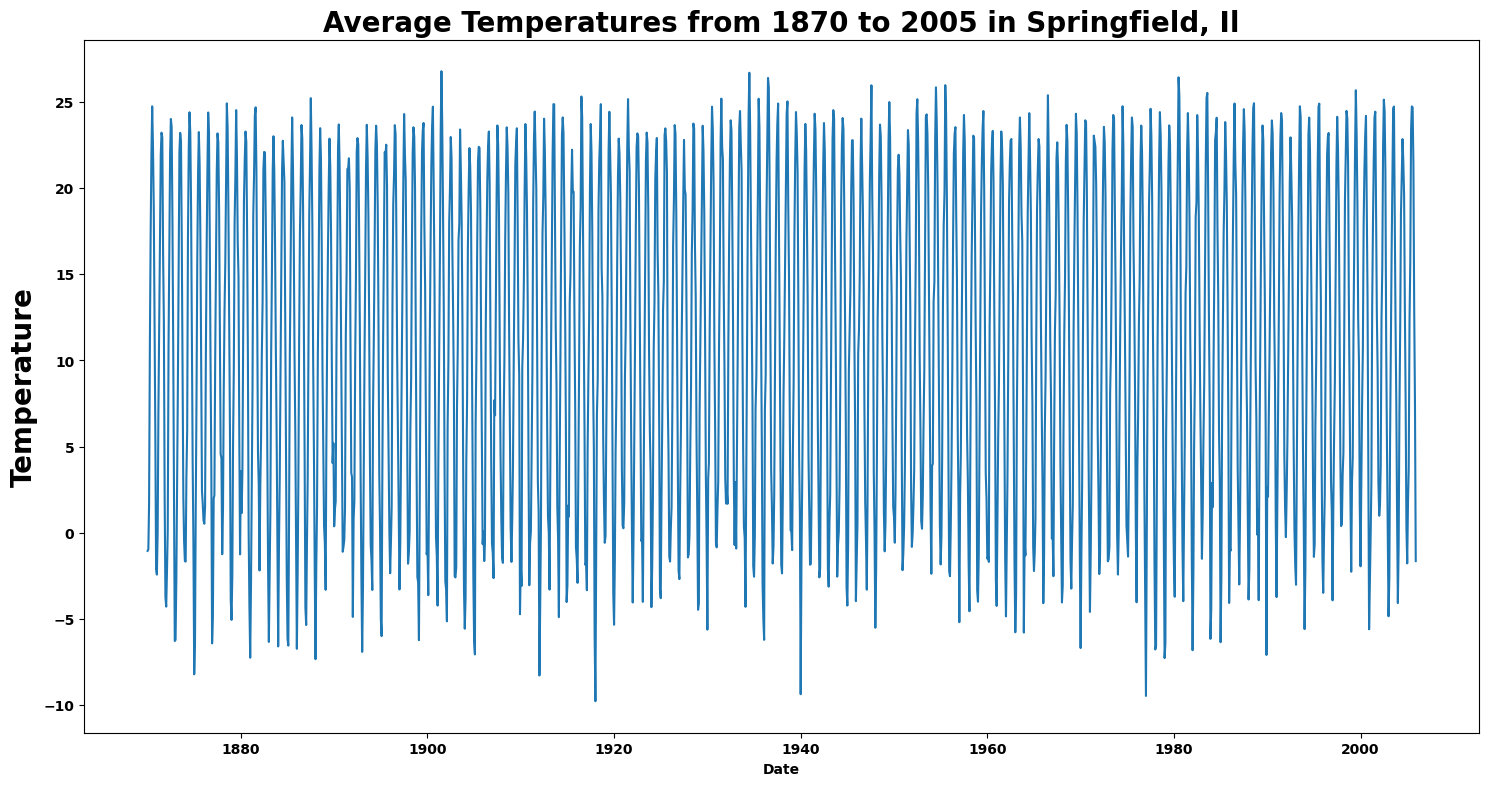

In [18]:
dims = (18, 9)
fig, ax = plt.subplots(figsize = dims)
sns.lineplot(data = US_Springfield_Drop_Group, x = 'Date', y = 'AverageTemperature')
plt.title("Average Temperatures from 1870 to 2005 in Springfield, Il", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
# US_Springfield_Drop_Group.plot(kind = 'line')
# plt.figsize = ((29,7))


plt.show()

In [19]:
temps_India = temps[temps['Country'] == 'India']
temps_India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014906 entries, 49880 to 8385509
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Date                1014906 non-null  datetime64[ns]
 1   AverageTemperature  960548 non-null   float64       
 2   City                1014906 non-null  object        
 3   Country             1014906 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 38.7+ MB


In [20]:
temps_India.City.value_counts()

Jhansi        2613
Motihari      2613
Naihati       2613
Nagpur        2613
Nagercoil     2613
              ... 
Chandigarh    2371
Batala        2371
Shimla        2371
Barnala       2371
Srinagar      2370
Name: City, Length: 391, dtype: int64

In [21]:
India_Jhansi = temps_India.loc[(temps_India['Date'] >= '1870-01-01') & (temps_India['Date'] <= '2005-12-01') & (temps_India['City'] == 'Jhansi')]

In [22]:
India_Jhansi.sort_values('Date', inplace = True)

C:\Users\Rosco\AppData\Local\Temp\ipykernel_17692\3620020983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_Jhansi.sort_values('Date', inplace = True)


In [23]:
India_Jhansi_Drop = India_Jhansi.drop(columns = ['City', 'Country'])

In [24]:
India_Jhansi_Drop

,Date,AverageTemperature
3407131,1870-01-01,15.951
3407132,1870-02-01,18.631
3407133,1870-03-01,24.152
3407134,1870-04-01,30.266
3407135,1870-05-01,34.460
...,...,...
3408758,2005-08-01,28.051
3408759,2005-09-01,27.624
3408760,2005-10-01,25.567
3408761,2005-11-01,21.237


In [25]:
India_Jhansi_Drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 3407131 to 3408762
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1632 non-null   datetime64[ns]
 1   AverageTemperature  1632 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.2 KB


In [26]:
India_Jhansi_Drop['AverageTemperature'].interpolate(inplace = True)

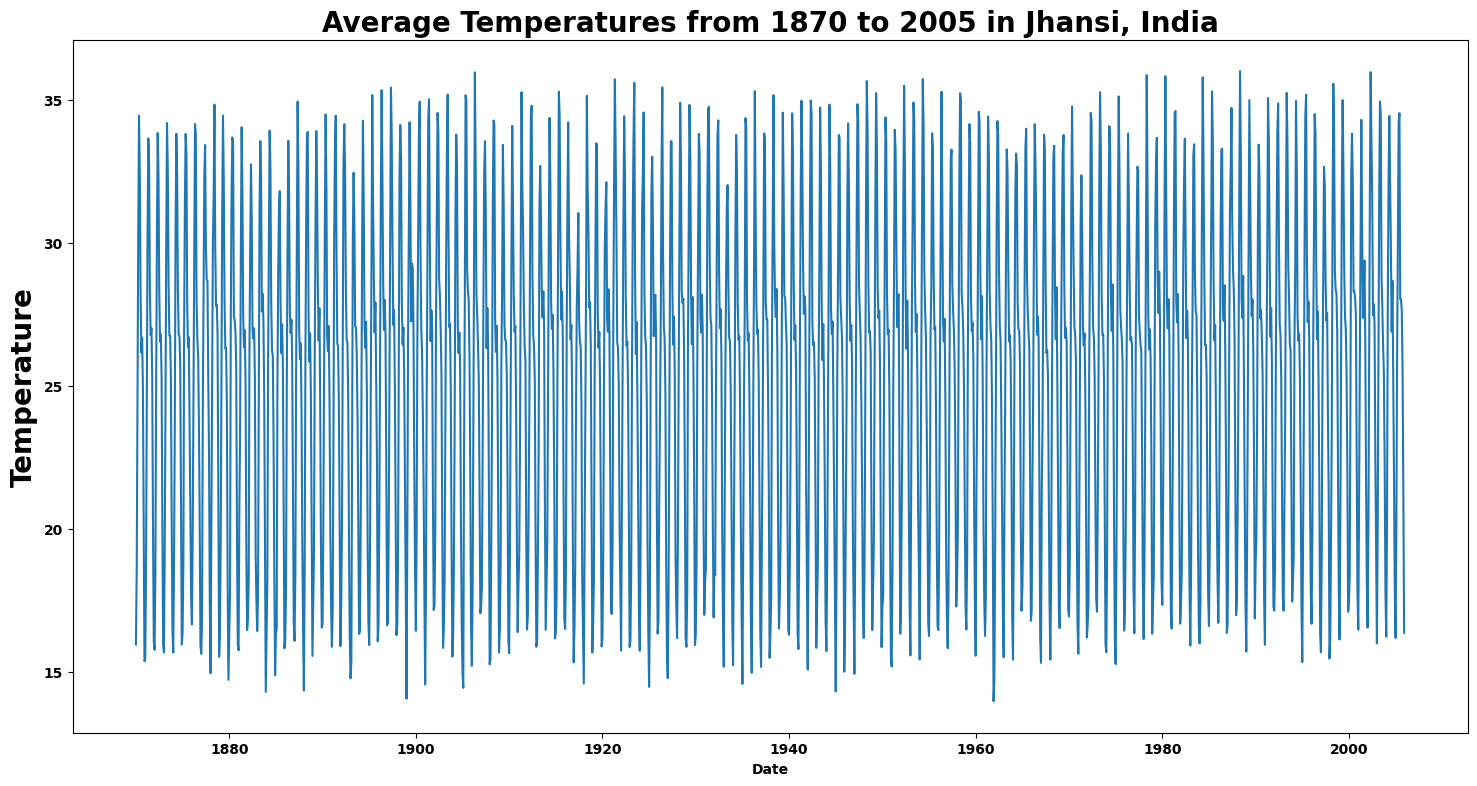

In [27]:
dims = (18, 9)
fig, ax = plt.subplots(figsize = dims)
sns.lineplot(data = India_Jhansi_Drop, x = 'Date', y = 'AverageTemperature')
plt.title("Average Temperatures from 1870 to 2005 in Jhansi, India", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.show()

In [28]:
temps_Japan = temps[temps['Country'] == 'Japan']

In [29]:
temps_Japan

,Date,AverageTemperature,City,Country
45530,1845-01-01,2.377,Abiko,Japan
45531,1845-02-01,1.312,Abiko,Japan
45532,1845-03-01,5.276,Abiko,Japan
45533,1845-04-01,10.387,Abiko,Japan
45534,1845-05-01,14.923,Abiko,Japan
...,...,...,...,...
8480047,2013-05-01,16.757,Zama,Japan
8480048,2013-06-01,20.927,Zama,Japan
8480049,2013-07-01,24.645,Zama,Japan
8480050,2013-08-01,26.364,Zama,Japan


In [30]:
temps_Japan[temps_Japan['City'] == 'Kadoma']

,Date,AverageTemperature,City,Country
3546226,1841-04-01,11.223,Kadoma,Japan
3546227,1841-05-01,16.572,Kadoma,Japan
3546228,1841-06-01,NaN,Kadoma,Japan
3546229,1841-07-01,NaN,Kadoma,Japan
3546230,1841-08-01,NaN,Kadoma,Japan
...,...,...,...,...
3548291,2013-05-01,18.358,Kadoma,Japan
3548292,2013-06-01,22.490,Kadoma,Japan
3548293,2013-07-01,26.915,Kadoma,Japan
3548294,2013-08-01,28.181,Kadoma,Japan


In [31]:
Japan_Kadoma = temps_Japan.loc[(temps_Japan['Date'] >= '1870-01-01') & (temps_Japan['Date'] <= '2005-12-01') & (temps_Japan['City'] == 'Kadoma')]

In [32]:
Japan_Kadoma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 3546571 to 3548202
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1632 non-null   datetime64[ns]
 1   AverageTemperature  1632 non-null   float64       
 2   City                1632 non-null   object        
 3   Country             1632 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 63.8+ KB


In [33]:
Japan_Kadoma_Drop = Japan_Kadoma.drop(columns = ['City', 'Country'])

In [34]:
Japan_Kadoma_Drop.sort_values('Date', inplace = True)

In [35]:
Japan_Kadoma_Drop['AverageTemperature'].interpolate(inplace = True)

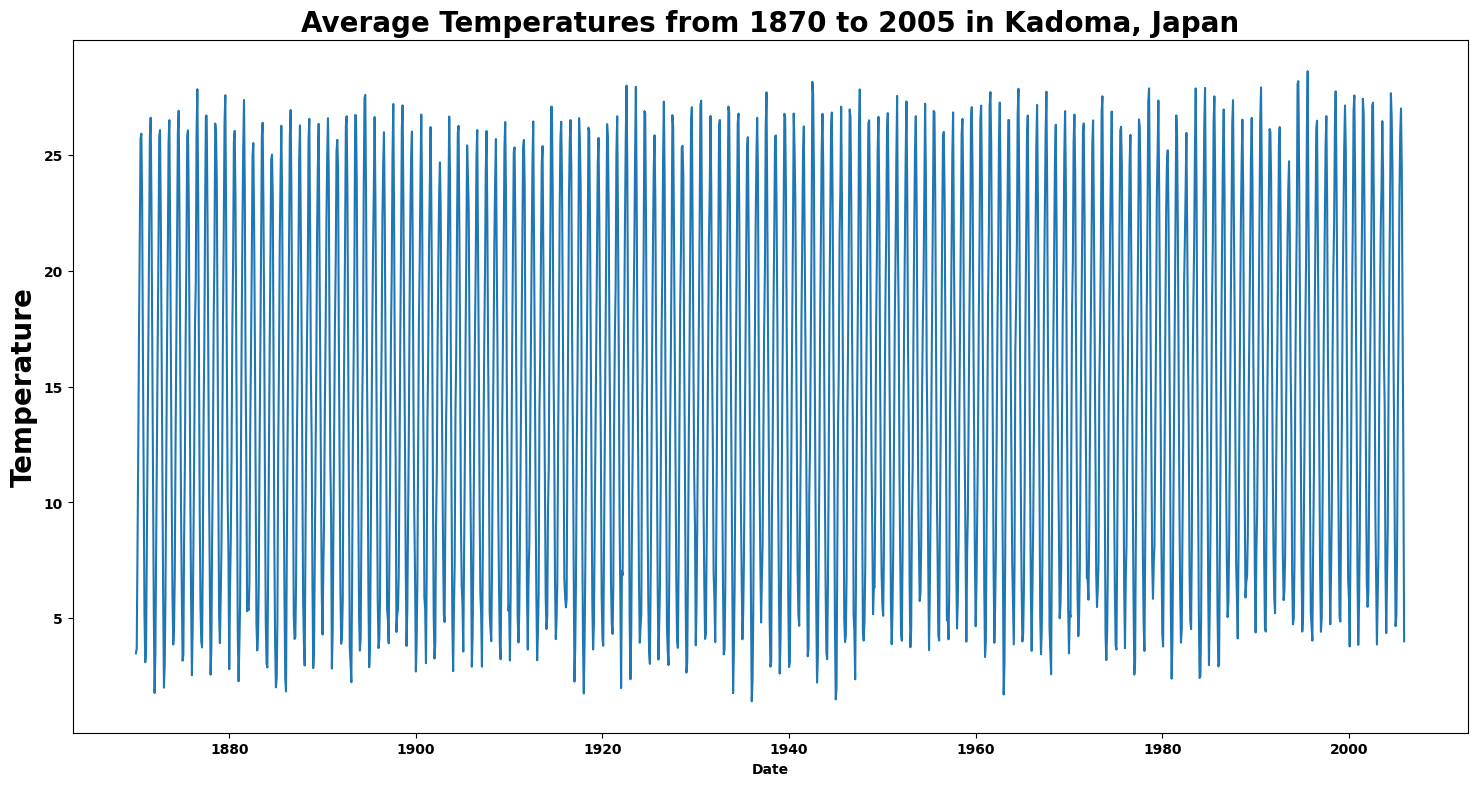

In [36]:
dims = (18, 9)
fig, ax = plt.subplots(figsize = dims)
sns.lineplot(data = Japan_Kadoma_Drop, x = 'Date', y = 'AverageTemperature')
plt.title("Average Temperatures from 1870 to 2005 in Kadoma, Japan", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.show()

In [37]:
temps_UK = temps[temps['Country'] == 'United Kingdom']

In [38]:
UK_Manchester = temps_UK.loc[(temps_UK['Date'] >= '1870-01-01') & (temps_UK['Date'] <= '2005-12-01') & (temps_UK['City'] == 'Manchester')]

In [39]:
UK_Manchester.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 4589639 to 4591270
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1632 non-null   datetime64[ns]
 1   AverageTemperature  1632 non-null   float64       
 2   City                1632 non-null   object        
 3   Country             1632 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 63.8+ KB


In [40]:
UK_Manchester_Drop = UK_Manchester.drop(columns = ['City', 'Country'])

In [41]:
UK_Manchester_Drop.sort_values('Date', inplace = True)

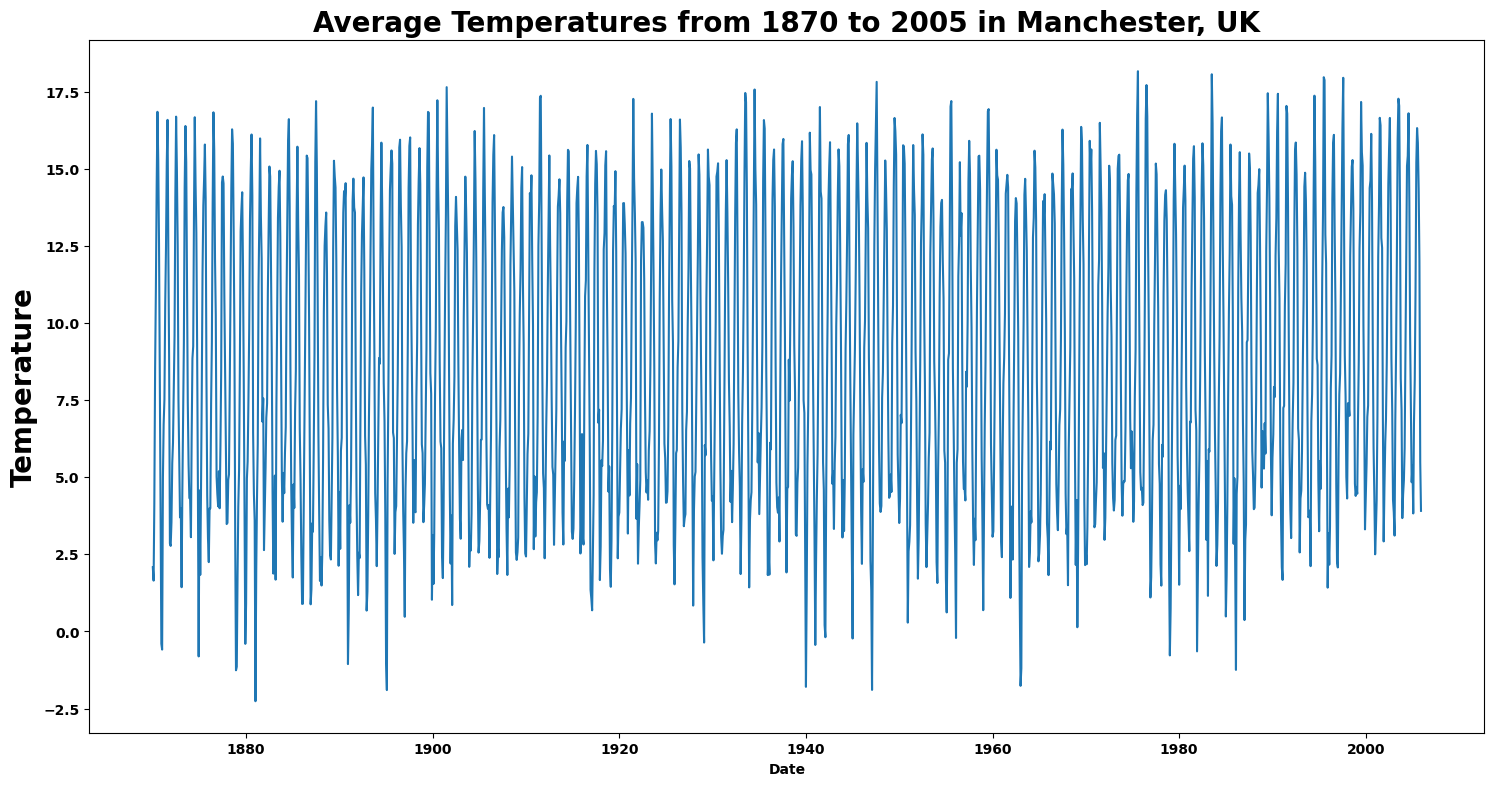

In [42]:
dims = (18, 9)
fig, ax = plt.subplots(figsize = dims)
sns.lineplot(data = UK_Manchester_Drop, x = 'Date', y = 'AverageTemperature')
plt.title("Average Temperatures from 1870 to 2005 in Manchester, UK", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.show()

In [43]:
temps_Cambodia = temps[temps['Country'] == 'Cambodia']

In [44]:
Cambodia_Phnum = temps_Cambodia.loc[(temps_Cambodia['Date'] >= '1870-01-01') & (temps_Cambodia['Date'] <= '2005-12-01')]

In [45]:
Cambodia_Phnum

,Date,AverageTemperature,City,Country
5852359,1870-01-01,24.200,Phnum Pénh,Cambodia
5852360,1870-02-01,25.285,Phnum Pénh,Cambodia
5852361,1870-03-01,27.429,Phnum Pénh,Cambodia
5852362,1870-04-01,28.764,Phnum Pénh,Cambodia
5852363,1870-05-01,27.905,Phnum Pénh,Cambodia
...,...,...,...,...
5853986,2005-08-01,27.826,Phnum Pénh,Cambodia
5853987,2005-09-01,27.376,Phnum Pénh,Cambodia
5853988,2005-10-01,27.189,Phnum Pénh,Cambodia
5853989,2005-11-01,26.878,Phnum Pénh,Cambodia


In [46]:
Cambodia_Phnum_Drop = Cambodia_Phnum.drop(columns = ['City', 'Country'])

In [47]:
Cambodia_Phnum_Drop['AverageTemperature'].interpolate(inplace = True)

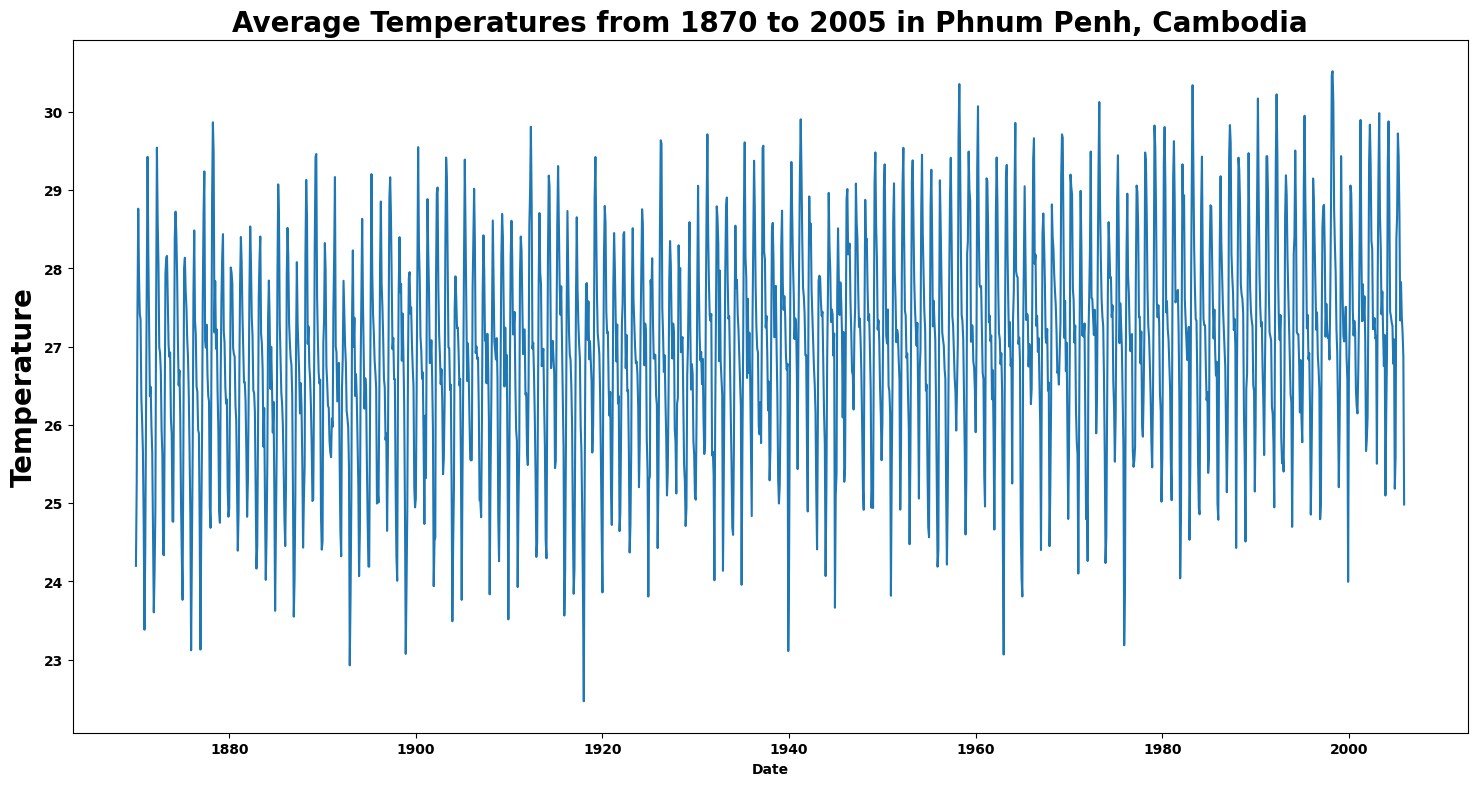

In [48]:
dims = (18, 9)
fig, ax = plt.subplots(figsize = dims)
sns.lineplot(data = Cambodia_Phnum_Drop, x = 'Date', y = 'AverageTemperature')
plt.title("Average Temperatures from 1870 to 2005 in Phnum Penh, Cambodia", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.show()

In [49]:
temps_Senegal = temps[temps['Country'] == 'Senegal']

In [50]:
Senegal_Dakar = temps_Senegal.loc[(temps_Senegal['Date'] >= '1870-01-01') & (temps_Senegal['Date'] <= '2005-12-01') & (temps_Senegal['City'] == 'Dakar')]

In [51]:
Senegal_Dakar_Drop = Senegal_Dakar.drop(columns = ['City', 'Country'])

In [52]:
Senegal_Dakar_Drop['AverageTemperature'].interpolate(inplace = True)

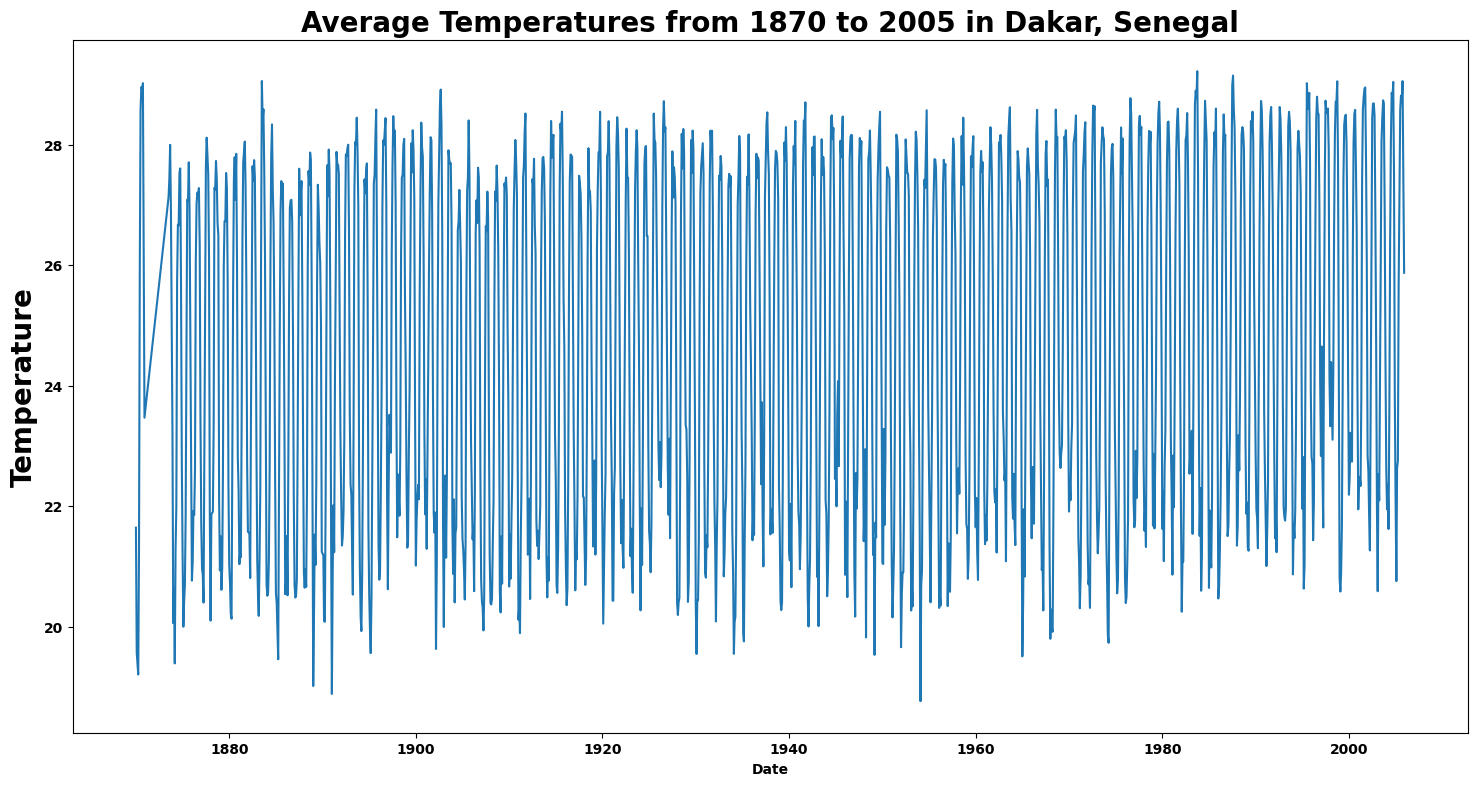

In [53]:
dims = (18, 9)
fig, ax = plt.subplots(figsize = dims)
sns.lineplot(data = Senegal_Dakar_Drop, x = 'Date', y = 'AverageTemperature')
plt.title("Average Temperatures from 1870 to 2005 in Dakar, Senegal", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.show()

In [54]:
temps_Haiti = temps[temps['Country'] == 'Haiti']

In [55]:
Haiti_Prince = temps_Haiti.loc[(temps_Haiti['Date'] >= '1870-01-01') & (temps_Haiti['Date'] <= '2005-12-01') & (temps_Haiti['City'] == 'Port Au Prince')]

In [56]:
Haiti_Prince.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 5968978 to 5970609
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1632 non-null   datetime64[ns]
 1   AverageTemperature  1632 non-null   float64       
 2   City                1632 non-null   object        
 3   Country             1632 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 63.8+ KB


In [57]:
Haiti_Prince_Drop = Haiti_Prince.drop(columns = ['City', 'Country'])

In [58]:
Haiti_Prince_Drop

,Date,AverageTemperature
5968978,1870-01-01,25.010
5968979,1870-02-01,24.626
5968980,1870-03-01,24.556
5968981,1870-04-01,25.193
5968982,1870-05-01,26.313
...,...,...
5970605,2005-08-01,28.913
5970606,2005-09-01,28.853
5970607,2005-10-01,27.286
5970608,2005-11-01,27.475


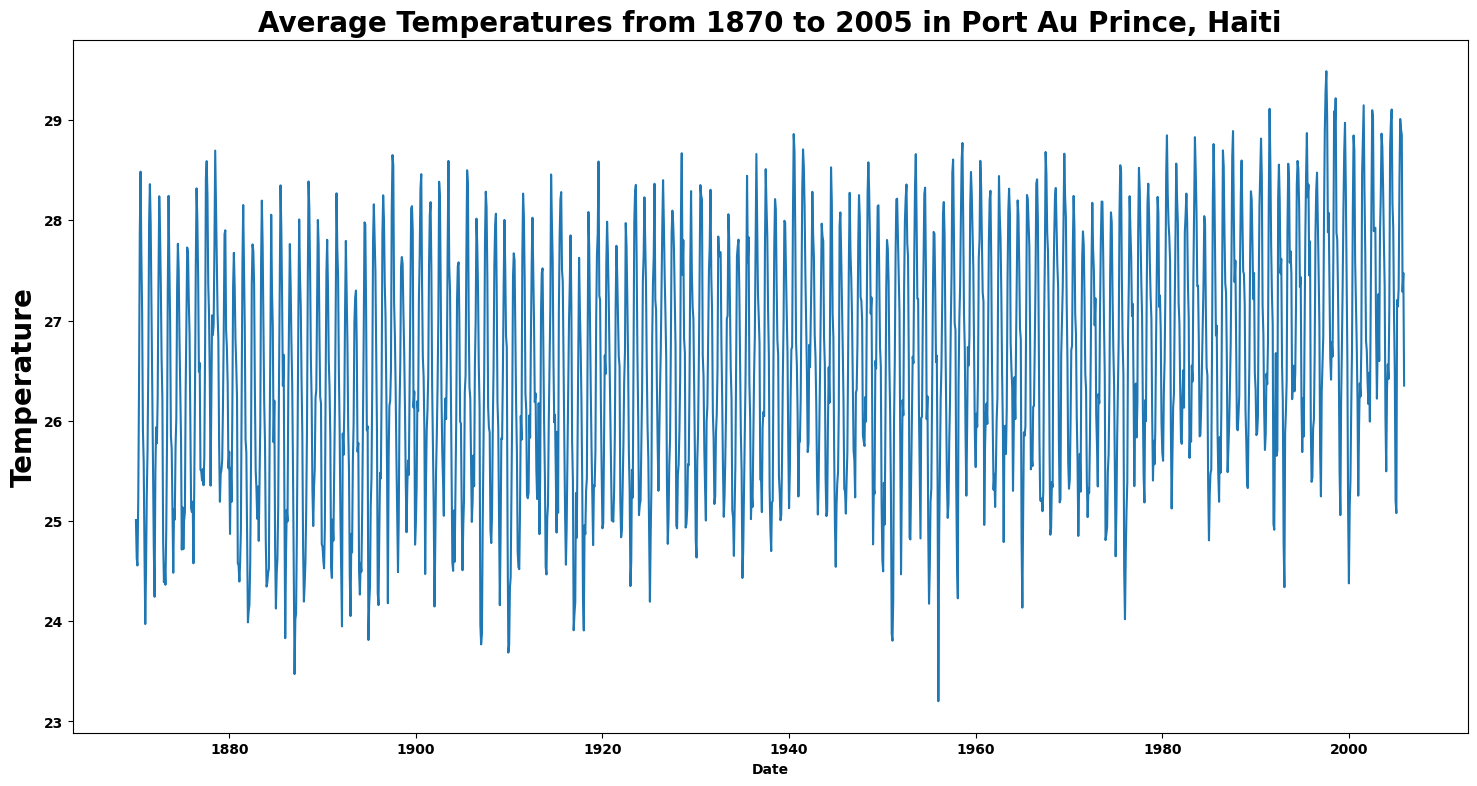

In [59]:
dims = (18, 9)
fig, ax = plt.subplots(figsize = dims)
sns.lineplot(data = Haiti_Prince_Drop, x = 'Date', y = 'AverageTemperature')
plt.title("Average Temperatures from 1870 to 2005 in Port Au Prince, Haiti", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.show()

#### The data has now been cleaned and organized.  At this point I want to determine if the graphs are stationary.  I will import the 'plot_acf', 'plot_pacf' and 'adfuller' tools.

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#### Now I want to use the autocorrelation function to determine if the graphs are stationary.

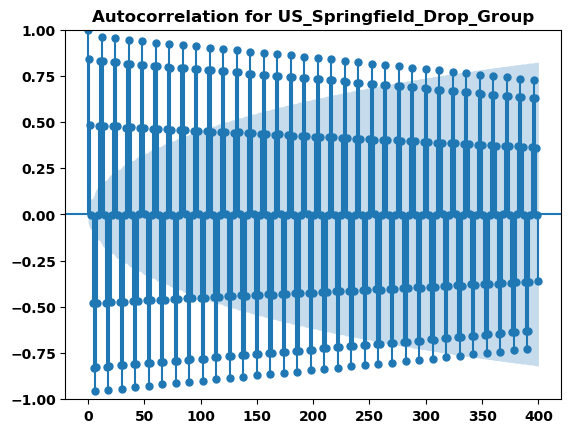

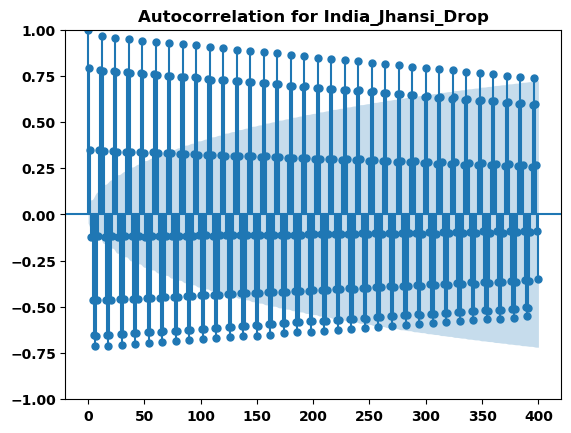

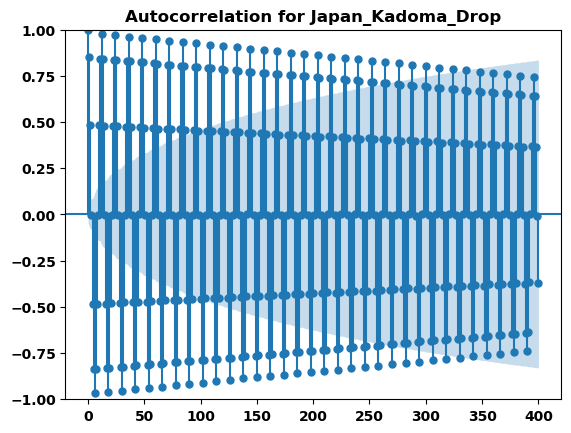

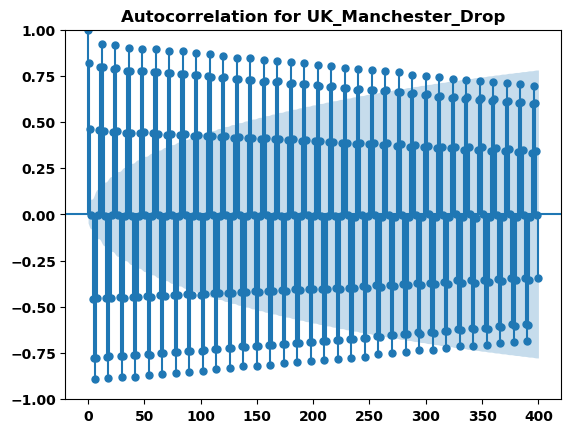

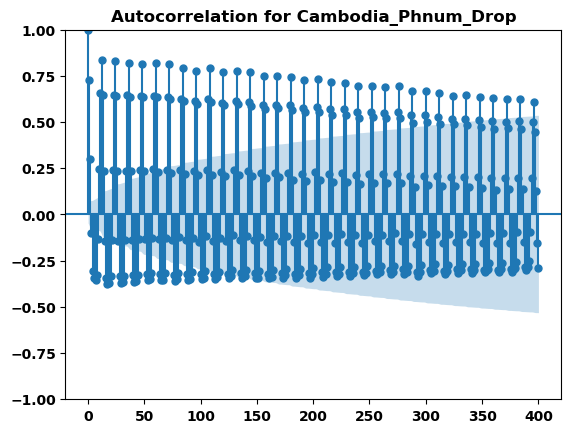

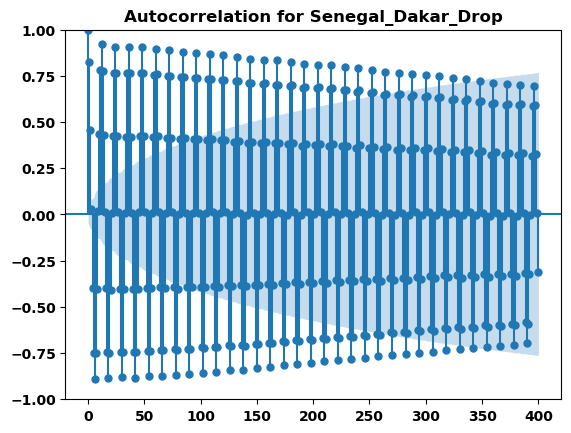

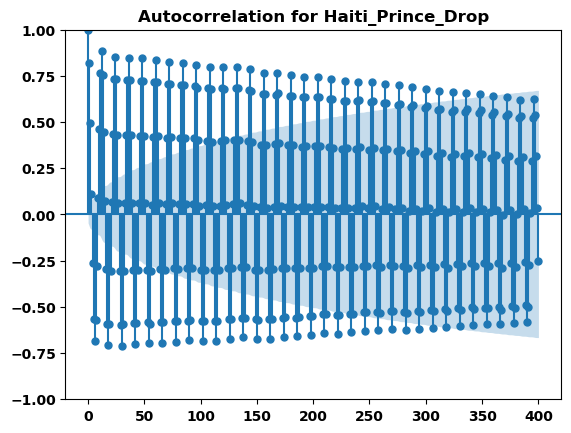

In [115]:
DFs = [US_Springfield_Drop_Group, India_Jhansi_Drop, Japan_Kadoma_Drop, UK_Manchester_Drop, Cambodia_Phnum_Drop, \
       Senegal_Dakar_Drop, Haiti_Prince_Drop]

names = ['US_Springfield_Drop_Group', 'India_Jhansi_Drop', 'Japan_Kadoma_Drop', 'UK_Manchester_Drop', 'Cambodia_Phnum_Drop', \
       'Senegal_Dakar_Drop', 'Haiti_Prince_Drop']

for df, name in zip(DFs, names):
    plot_acf(df["AverageTemperature"], lags = 400)
    plt.title("Autocorrelation for {}".format(name))
    plt.show()

#### Based on the fact the autocorrelation functions for each of the cities is decaying, an autoregressive process is definitely present.  In these series it was necessary to use a high number of lags to graphically display that the ACF does indeed decay. 

#### I want to run the adfuller test for each of the 7 cities to confirm that these series are stationary:

In [120]:
adf_test_results = {}
for df, name in zip(DFs, names):
    adf_test_results[name] = adfuller(df["AverageTemperature"], autolag = 'BIC', regression = 'c')

In [121]:
result = ['stationary.', 'not stationary.']
for key, value in adf_test_results.items():
    print(f"The p-value for {key} is {value[1]}.")
    print(f"The {key} time series is {[result[0] if value[1] < .05 else result[1]]}")
    print(" ")


The p-value for US_Springfield_Drop_Group is 0.00016901117462240386.
The US_Springfield_Drop_Group time series is ['stationary.']
 
The p-value for India_Jhansi_Drop is 1.6567337194306005e-05.
The India_Jhansi_Drop time series is ['stationary.']
 
The p-value for Japan_Kadoma_Drop is 0.0026954689730215547.
The Japan_Kadoma_Drop time series is ['stationary.']
 
The p-value for UK_Manchester_Drop is 0.00035247407870108094.
The UK_Manchester_Drop time series is ['stationary.']
 
The p-value for Cambodia_Phnum_Drop is 0.0004847675261040985.
The Cambodia_Phnum_Drop time series is ['stationary.']
 
The p-value for Senegal_Dakar_Drop is 7.382817443994904e-05.
The Senegal_Dakar_Drop time series is ['stationary.']
 
The p-value for Haiti_Prince_Drop is 0.012244288269107766.
The Haiti_Prince_Drop time series is ['stationary.']
 


#### Since the p-value for each city's dataframe is less than .05, each city's time series is stationary.


#### Now I will calculate the PACF for each timeseries to better determine which lags may be most influential to a timeseries model.

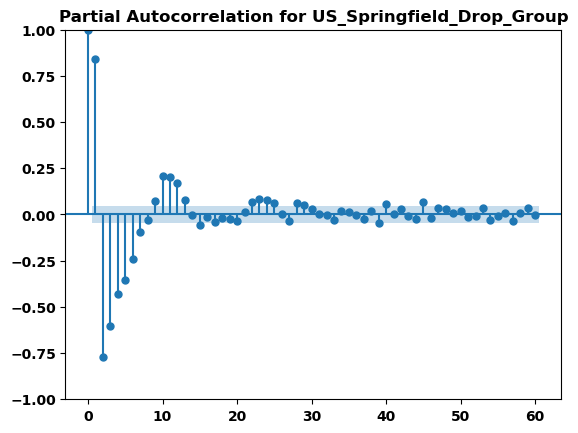

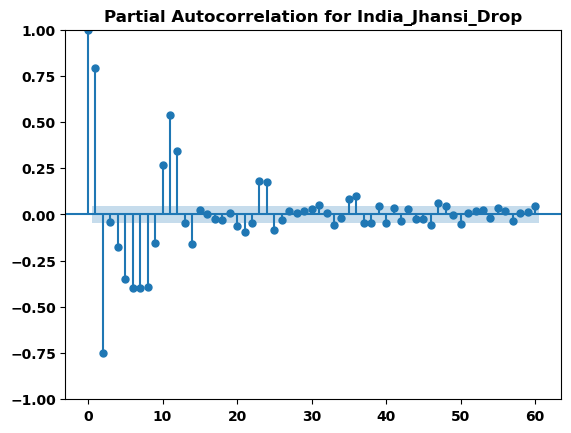

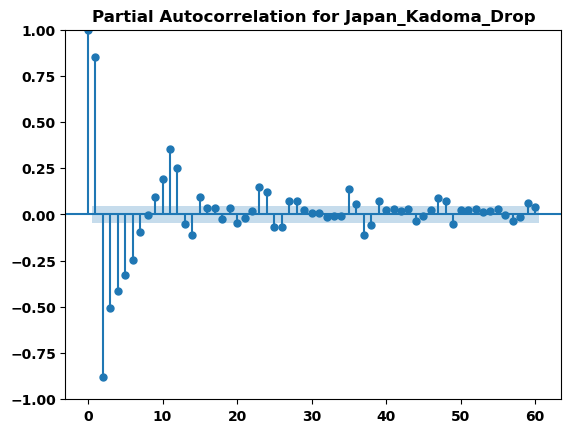

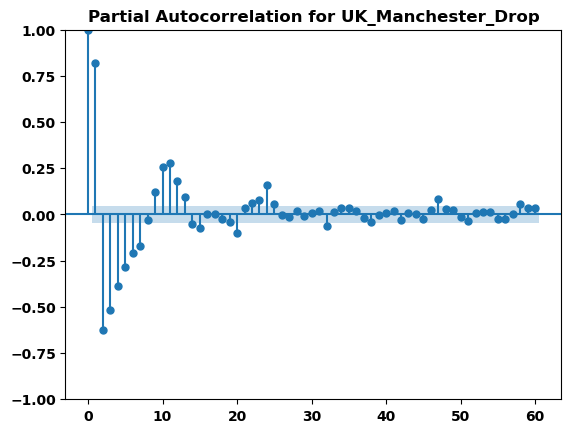

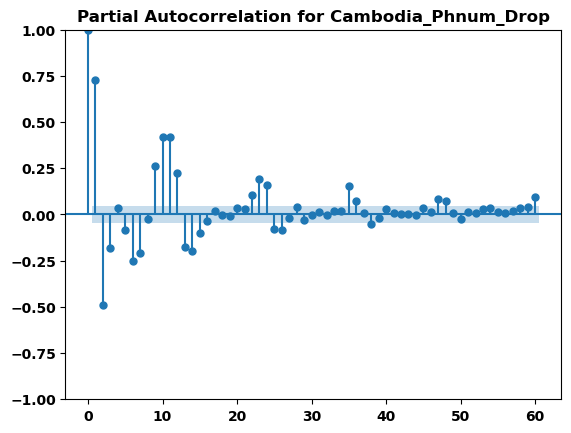

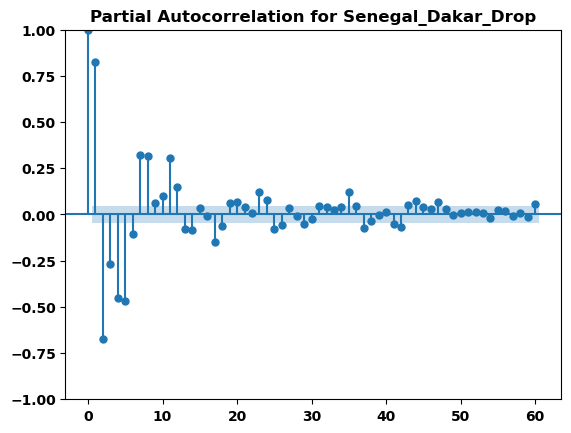

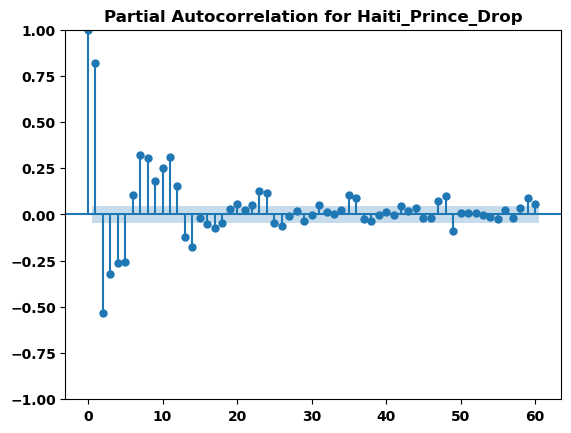

In [117]:
for df, name in zip(DFs, names):
    plot_pacf(df["AverageTemperature"], lags = 60)
    plt.title("Partial Autocorrelation for {}".format(name))
    plt.show()

#### The 7 timeseries have different PACF graphs, but in general they all indicate that the first 4 to 7 lags will significantly influence the model.